[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Isolation Forest - Exercise

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 21/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0073AnomalyDetectionIsolationForest.ipynb)

In [2]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [3]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [4]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

DATA_FILE_URL = r'https://github.com/FixelAlgorithmsTeam/FixelCourses/raw/master/DataSets/NewYorkTaxiDrives.csv'


In [5]:
# Courses Packages


In [6]:
# General Auxiliary Functions
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotScatterData

## Anomaly Detection by Isolation Forest

This notebook goes through:

1. Creating a simple synthetic data set.
2. Plotting the decision boundary of the Isolation Forest model.

* <font color='brown'>(**#**)</font> You may try different color spaces.
* <font color='brown'>(**#**)</font> You may try different scaling of the features.



In [7]:
# Parameters

# Data Generation
numSamples  = 150
numOutliers = 50
vMu001      = np.array([2, 2])
vMu002      = np.array([-2, -2])
mCov001     = np.array([[0.2, -0.05], [0.3, 0.15]]) #<! Covariance Matrix
mCov002     = np.array([[0.5, 0], [0, 0.5]]) #<! Covariance Matrix

trainSize = 0.7

# Model
numEstimators       = 50
contaminationRatio  = 'auto'


## Generate / Load Data

The data will be composed by:

 - Inliers - Gaussian samples (Clusters).
 - Outliers - Uniform samples.


In [8]:
# Generate Data

#===========================Fill This===========================#
# 1. Generate an inlier cluster with Gaussian Random Number with `mCov001` as covariance and `vMu001` as mean.
# 2. Generate an inlier cluster with Gaussian Random Number with `mCov002` as covariance and `vMu002` as mean.
# 3. Generate the outliers by a uniform distribution on the range [-4, 4] in 2D.
# !! You may use `np.random.uniform()`.
mX1 = (np.random.randn(numSamples, 2) @ mCov001) + vMu001  #<! Cluster 001
mX2 = (np.random.randn(numSamples, 2) @ mCov002) + vMu002  #<! Cluster 002
mX3 = np.random.uniform(low = -4, high = 4, size = (numOutliers, 2)) #<! Outliers
#===============================================================#

mX = np.concatenate([mX1, mX2, mX3])
vY = np.concatenate([np.zeros((2 * numSamples), dtype = int), np.ones((numOutliers), dtype = int)])


print(f'The data shape: {mX.shape}')

The data shape: (350, 2)


## Pre Processing

We'll split the data into Train & Test.

In [9]:
# Train & Test Split

#===========================Fill This===========================#
# 1. Generate stratified split using `trainSize` as train size ratio.
mXTrain, mXTest, vYTrain, vYTest = train_test_split(mX, vY, train_size = trainSize, stratify = vY, random_state = seedNum)
#===============================================================#

print(f'The train features data shape: {mXTrain.shape}')
print(f'The test features data shape: {mXTest.shape}')

The train features data shape: (244, 2)
The test features data shape: (106, 2)


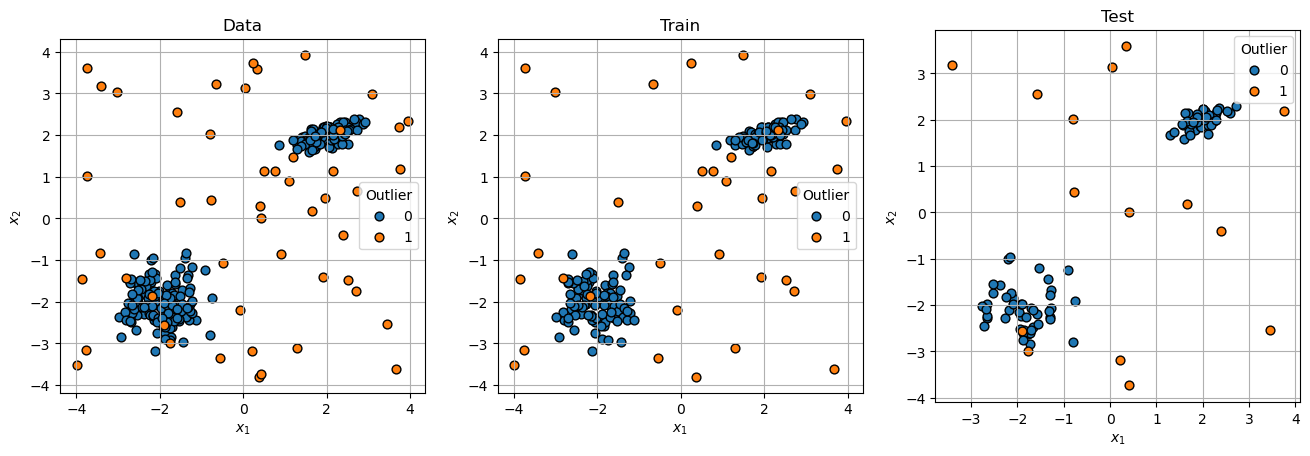

In [10]:
# Plot Data

hF, hAs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 8))
hAs = hAs.flat

for mXX, vYY, titleStr, hA in zip([mX, mXTrain, mXTest], [vY, vYTrain, vYTest], ['Data', 'Train', 'Test'], hAs):
    hA = PlotScatterData(mXX, vYY, markerSize = 40, hA = hA)
    hA.set_aspect(1)
    hA.set_title(titleStr)
    hA.get_legend().set_title('Outlier')

## Anomaly Detection by Isolation Forest



In [11]:
# Model
# Build and fit the model.

#===========================Fill This===========================#
# 1. Construct the Isolation Forest model using `numEstimators` and `contaminationRatio`.
# 2. Fit it to the train data.
oIsoForestOutDet = IsolationForest(n_estimators = numEstimators, contamination = contaminationRatio)
oIsoForestOutDet = oIsoForestOutDet.fit(mXTrain)
#===============================================================#

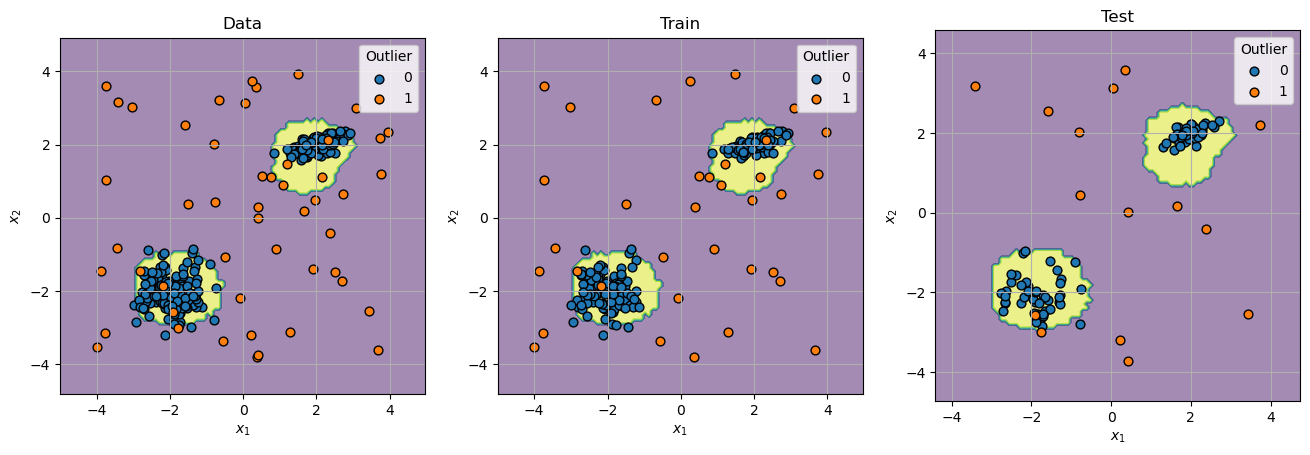

In [12]:
# Plot Decision Boundary

hF, hAs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 8))
hAs = hAs.flat

for mXX, vYY, titleStr, hA in zip([mX, mXTrain, mXTest], [vY, vYTrain, vYTest], ['Data', 'Train', 'Test'], hAs):
    oDecBoundary = DecisionBoundaryDisplay.from_estimator(oIsoForestOutDet, mXX, response_method = 'predict', alpha = 0.5, ax = hA)
    hA = PlotScatterData(mXX, vYY, markerSize = 40, hA = hA)
    hA.set_aspect(1)
    hA.set_title(titleStr)
    hA.get_legend().set_title('Outlier')

plt.show()


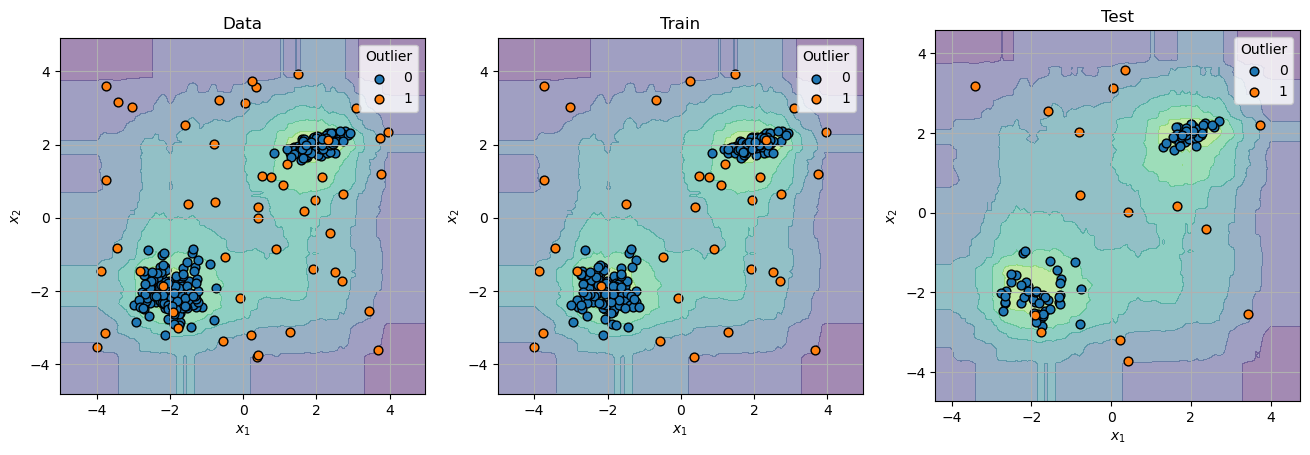

In [13]:
# Plot Decision Probability

hF, hAs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 8))
hAs = hAs.flat

for mXX, vYY, titleStr, hA in zip([mX, mXTrain, mXTest], [vY, vYTrain, vYTest], ['Data', 'Train', 'Test'], hAs):
    oDecBoundary = DecisionBoundaryDisplay.from_estimator(oIsoForestOutDet, mXX, response_method = 'decision_function', alpha = 0.5, ax = hA)
    hA = PlotScatterData(mXX, vYY, markerSize = 40, hA = hA)
    hA.set_aspect(1)
    hA.set_title(titleStr)
    hA.get_legend().set_title('Outlier')

plt.show()